In this week we'll begin with
# Time Series

In [1]:
# importing some vital libaries.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def plot_series(time, series, format_='-', start=0, end=None, label=None):
    # data for x-axis and y-axis.
    plt.plot(time[start:end], series[start:end], format_, label=label)
    plt.xlabel('Time') # naming the x-axis
    plt.ylabel('Value') # naming the y-axis
    if label:
        plt.legend(fontsize=14)  
    plt.grid(True) # show the grids on the graph.

In [3]:
# getting the trend data.
def trend(time, slope=0):
    return slope * time

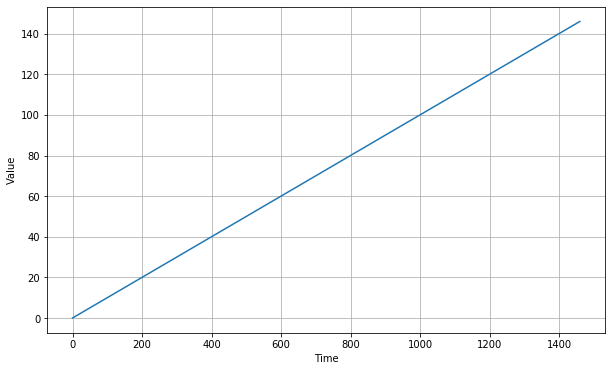

In [4]:
# Lets create a time series that just trends upward.

time = np.arange(4 * 365 + 1) # getting the time for 1 year.
baseline = 10
series = trend(time, 0.1)  # slope of 0.1

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [5]:
# Lets generate a time series with a seasonal pattern.

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time *2 * np.pi),
                   1 / np.exp(3* season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

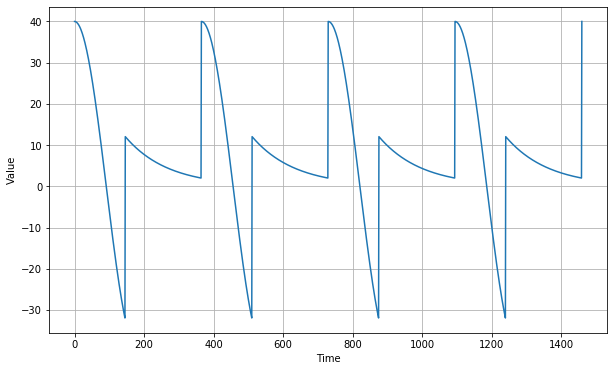

In [6]:
# getting the seasonality
amplitude = 40
series = seasonality(time, period = 365, amplitude=amplitude) # for a year.

plt.figure(figsize=(10, 6)) # figure size must be (10, 6)
plot_series(time, series) 
plt.show() # show the figure.

In [7]:
def noise_fun(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

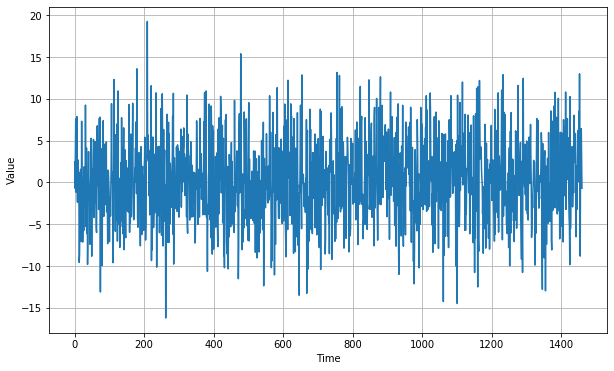

In [8]:
noise_level = 5
# lets create some noise.
noise = noise_fun(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

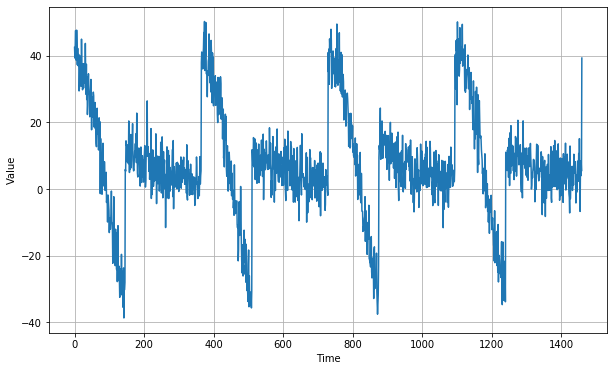

In [9]:
# add some noise in series.
series = series + noise
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

It does look realistic.

In [10]:
split_time = 1000
# spliting the data into training and validation.
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [11]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    _ = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time)+1):
        ar[step] += _ * ar[step-1]
    return ar[1:] * amplitude

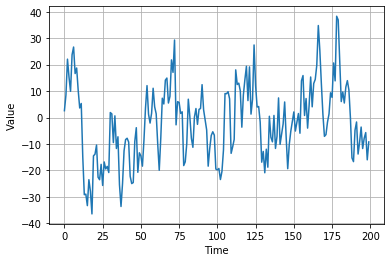

In [12]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

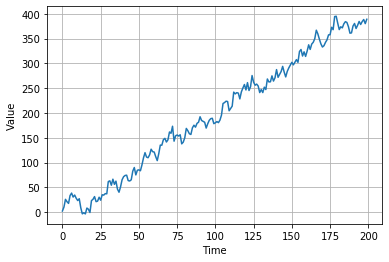

In [13]:
# this time i'll add autocorreation with trend.

series = autocorrelation(time, 10 , seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

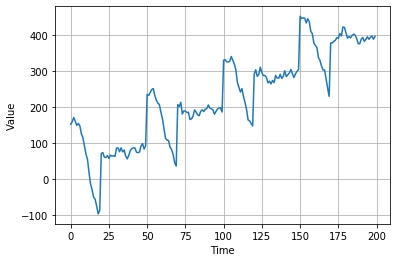

In [14]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, 
                                                          period=50, 
                                                          amplitude=150)+ trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

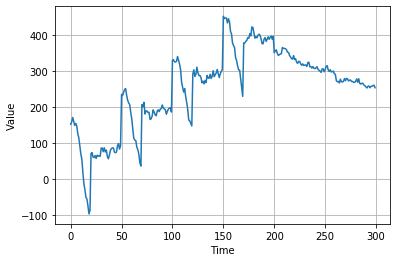

In [15]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]

plot_series(time[:300], series[:300])
plt.show()

In [16]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    
    for index in impulse_indices:
        series[index] += rnd.rand()* amplitude
    return series

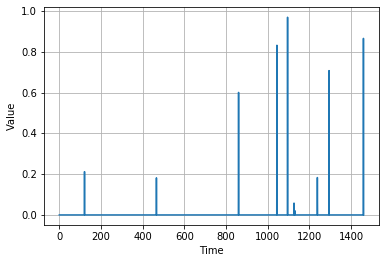

In [17]:
series =  impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [18]:
def autocorrelation(source, _s):
    ar = source.copy()
    max_lag = len(_s)
    for step, value in enumerate(source):
        for lag, i in _s.items():
            if step - lag >0:
                ar[step] += i * ar[step - lag]
    return ar

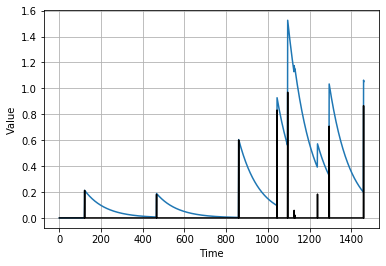

In [19]:
signal = impulses(time, 10,seed= 42)
series = autocorrelation(signal, {1:0.99})
plot_series(time, series)
plt.plot(time, signal, 'k-')
plt.show()

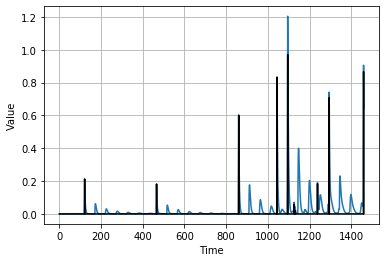

In [20]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1:0.70, 50:0.2})
plot_series(time, series)
plt.plot(time, signal, 'k-')
plt.show()

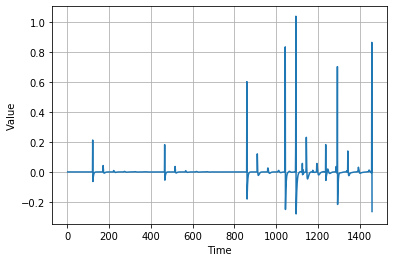

In [21]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

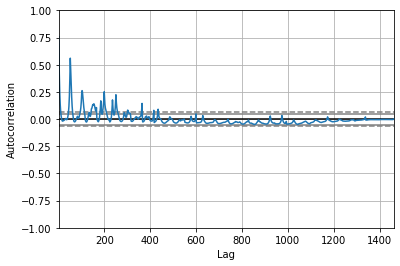

In [22]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

# Naive Forecast

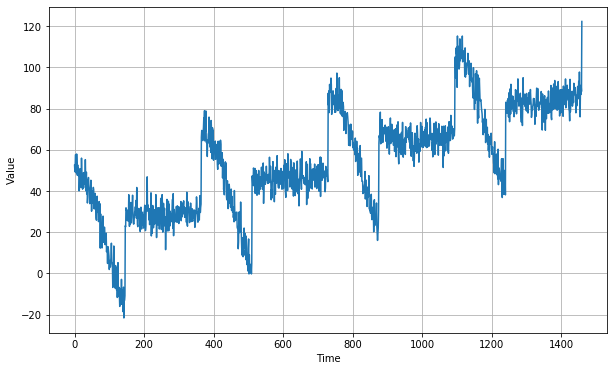

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

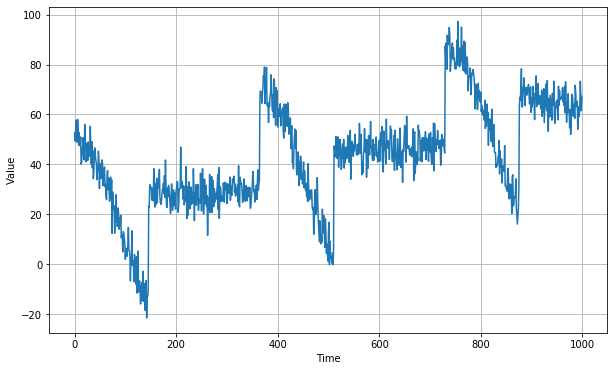

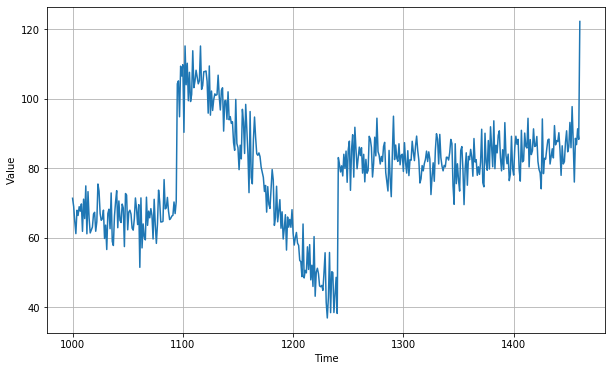

In [34]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

In [35]:
naive_forecast = series[split_time -1:-1]


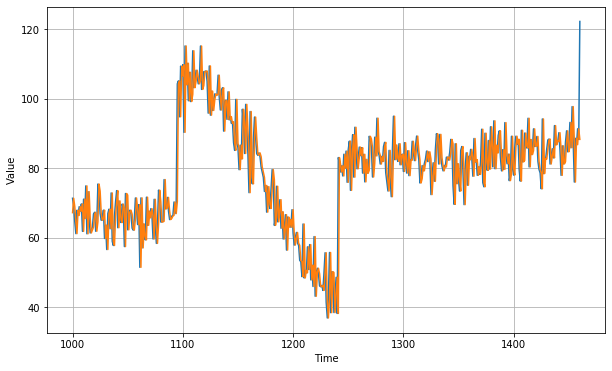

In [36]:
plt.figure(figsize=(10, 6))
# time is common on x-axis.
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

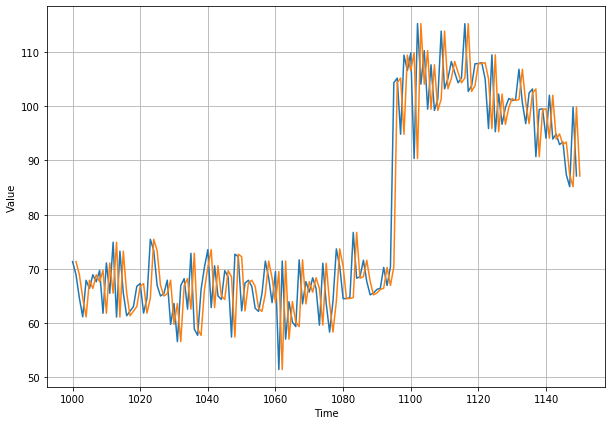

In [37]:
# lets zoom in on the validation period.
plt.figure(figsize=(10, 7))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

notice the Naive forecast lags 1 step behind the time series.

In [38]:
# compute the mean_squared_error and mean_absolute_error.
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827538
5.937908


In [41]:
# lets try a moving average.
def moving_average_forecast(series, window_size):
    """ Forecasts the mean of the last few values. If window_size = 1, then this is equivalent to
    naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time: time+window_size].mean())
    return np.array(forecast)

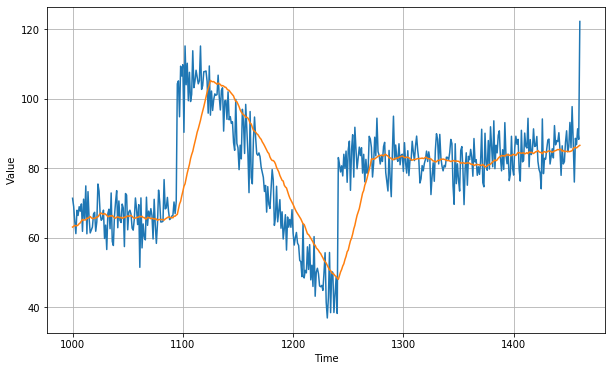

In [42]:
moving_avg = moving_average_forecast(series, 30)[split_time-30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [43]:
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(x_valid, moving_avg).numpy())
print(mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


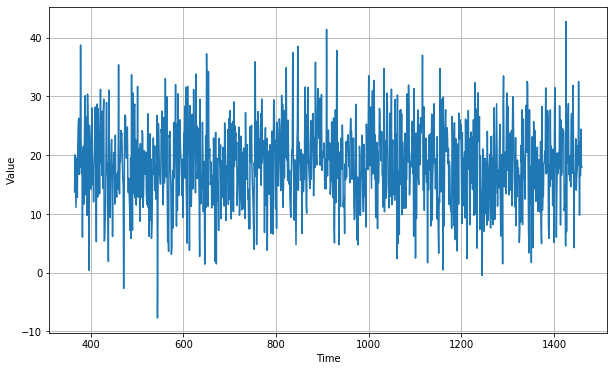

In [47]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

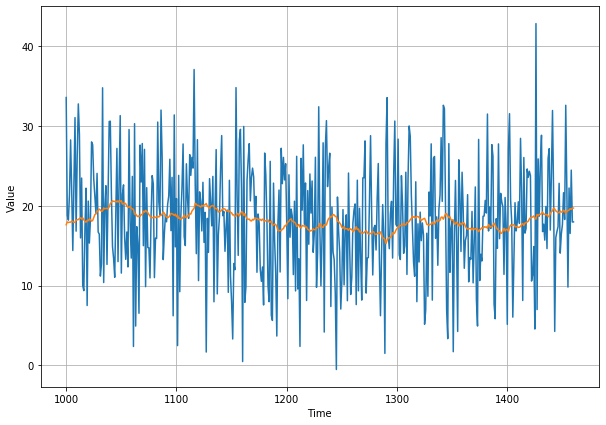

In [48]:
# using the moving average.

diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 -50:]

plt.figure(figsize=(10, 7))
plot_series(time_valid, diff_series[split_time-365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

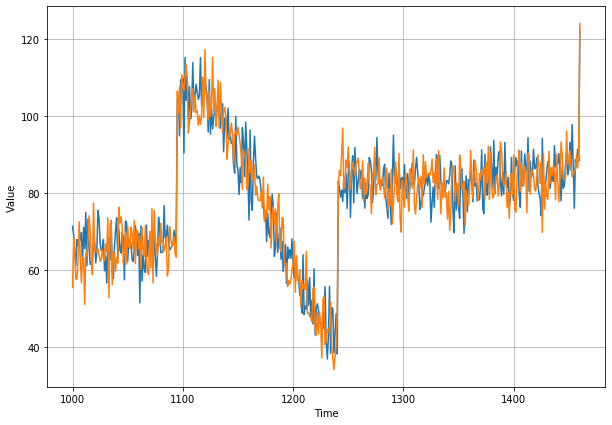

In [49]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10,7))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [50]:
print(mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

52.97366
5.839311


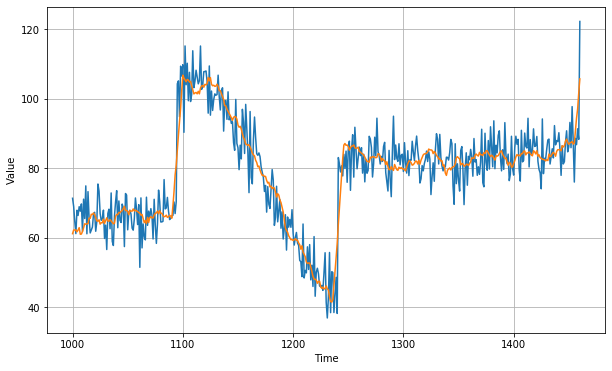

In [51]:
# lets use moving average on past values to remove some of the noise.

diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time-370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [53]:

print(mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

33.45226
4.569442
